<a href="https://colab.research.google.com/github/LourdesOshiroIgarashi/Sistemas_de_Apoio_a_Decisao/blob/main/plotacao_de_grafico_cumulativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.   Do número cumulativo de mortes confirmadas ao longo do tempo;
2.   Do número cumulativo de casos confirmados por mil habitantes ao longo do tempo;
3.Do número cumulativo de mortes confirmadas por mil habitantes ao longo do tempo.

In [ ]:
!pip install xlrd==1.2.0
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd #manipular nos dados
import matplotlib.pyplot as plt #criar tabela/gráficos
import seaborn as sns #exibição dos gráficos

In [ ]:
dados = pd.read_excel("/content/drive/MyDrive/Faculdade/3º semestre/Sistemas de Apoio à decisão/dados-12-14.xls")

In [ ]:
print(dados.shape) #número de linhas e colunas
print(dados.head(5)) #5 primeiras linhas
print(dados.dtypes) #tipos de dados do dataframe 

(1749, 10)
     dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020  21825     279                  Brazil    BR   
1 2020-12-13   13     12  2020  43900     686                  Brazil    BR   
2 2020-12-12   12     12  2020  54428     672                  Brazil    BR   
3 2020-12-11   11     12  2020  53347     770                  Brazil    BR   
4 2020-12-10   10     12  2020  53453     836                  Brazil    BR   

  countryterritoryCode  popData2018  
0                  BRA    211049519  
1                  BRA    211049519  
2                  BRA    211049519  
3                  BRA    211049519  
4                  BRA    211049519  
dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories           

In [ ]:
dados2 = dados.set_index("dateRep")
dados2 = dados2.sort_index()
print(dados2)

            day  month  year   cases  deaths   countriesAndTerritories geoId  \
dateRep                                                                        
2019-12-31   31     12  2019       0       0  United_States_of_America    US   
2019-12-31   31     12  2019       0       0                     Spain    ES   
2019-12-31   31     12  2019       0       0                    Brazil    BR   
2019-12-31   31     12  2019       0       0                     Italy    IT   
2019-12-31   31     12  2019      27       0                     China    CN   
...         ...    ...   ...     ...     ...                       ...   ...   
2020-12-13   13     12  2020   43900     686                    Brazil    BR   
2020-12-14   14     12  2020      12       0                     China    CN   
2020-12-14   14     12  2020  189723    1340  United_States_of_America    US   
2020-12-14   14     12  2020   17937     484                     Italy    IT   
2020-12-14   14     12  2020   21825    

In [ ]:
dados3 = dados2.pivot(columns="countriesAndTerritories")
print(dados3)

                           day                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                31.0  31.0  31.0  31.0                     31.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0   
2020-01-02                 2.0   2.0   2.0   2.0                      2.0   
2020-01-03                 3.0   3.0   3.0   3.0                      3.0   
2020-01-04                 4.0   4.0   4.0   4.0                      4.0   
...                        ...   ...   ...   ...                      ...   
2020-12-10                10.0  10.0  10.0  10.0                     10.0   
2020-12-11                11.0  11.0  11.0  11.0                     11.0   
2020-12-12                12.0  12.0  12.0  12.0                     12.0   
2020-12-13                13.0  13.0  13.0  13.0                     13.0   

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})

# <font color=yellow>Número cumulativo de mortes confirmadas ao longo do tempo


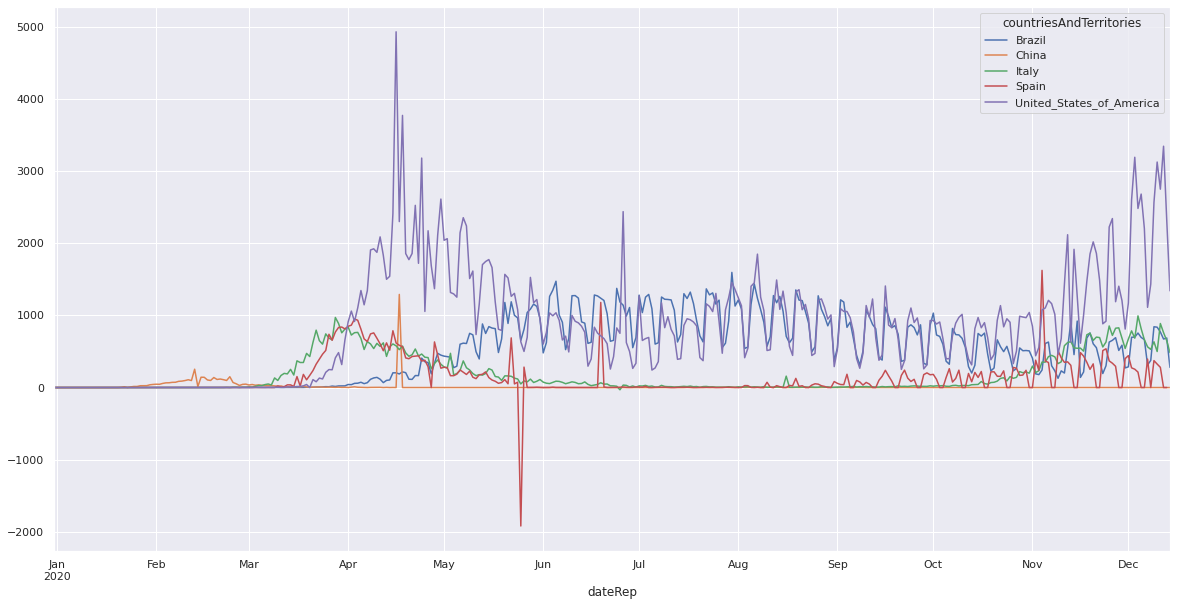

In [ ]:
dados3['deaths'].plot()

In [ ]:
dados2["CUM_DEATHS_OVER_TIME"] = dados2.groupby("countriesAndTerritories")["deaths"].cumsum()
dados4 = dados2.pivot(columns="countriesAndTerritories")
print(dados4.head(5))

                           day                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                31.0  31.0  31.0  31.0                     31.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0   
2020-01-02                 2.0   2.0   2.0   2.0                      2.0   
2020-01-03                 3.0   3.0   3.0   3.0                      3.0   
2020-01-04                 4.0   4.0   4.0   4.0                      4.0   

                         month                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                12.0  12.0  12.0  12.0                     12.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0  

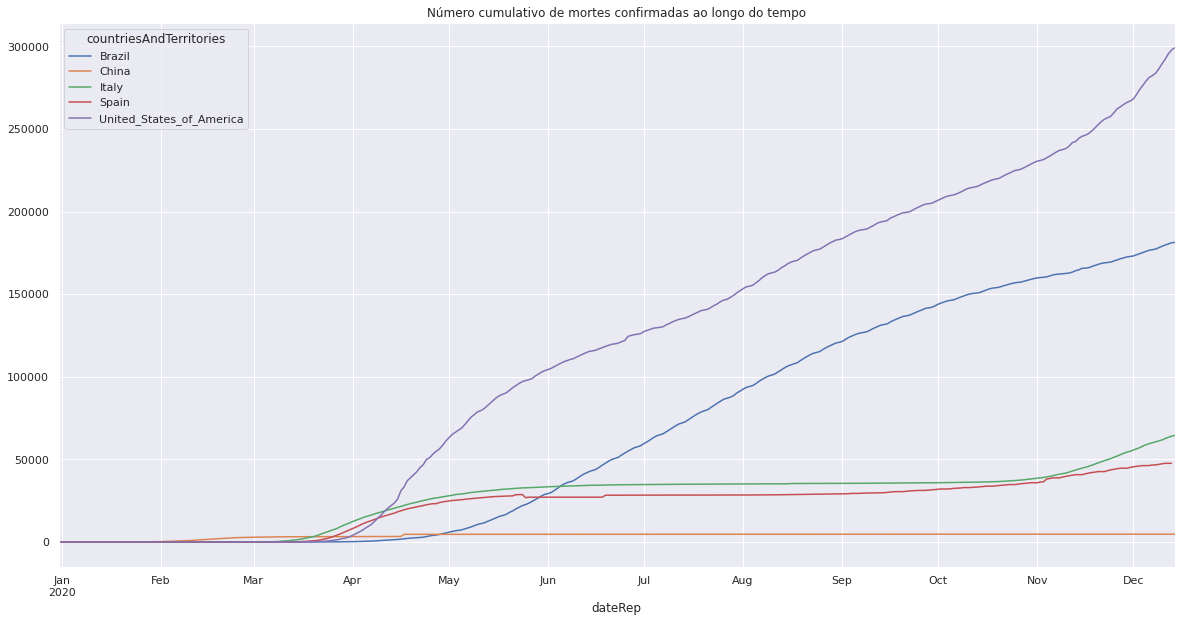

In [ ]:
dados4["CUM_DEATHS_OVER_TIME"].plot(title="Número cumulativo de mortes confirmadas ao longo do tempo")

# <font color=yellow>Número cumulativo de casos confirmados por mil habitantes ao longo do tempo



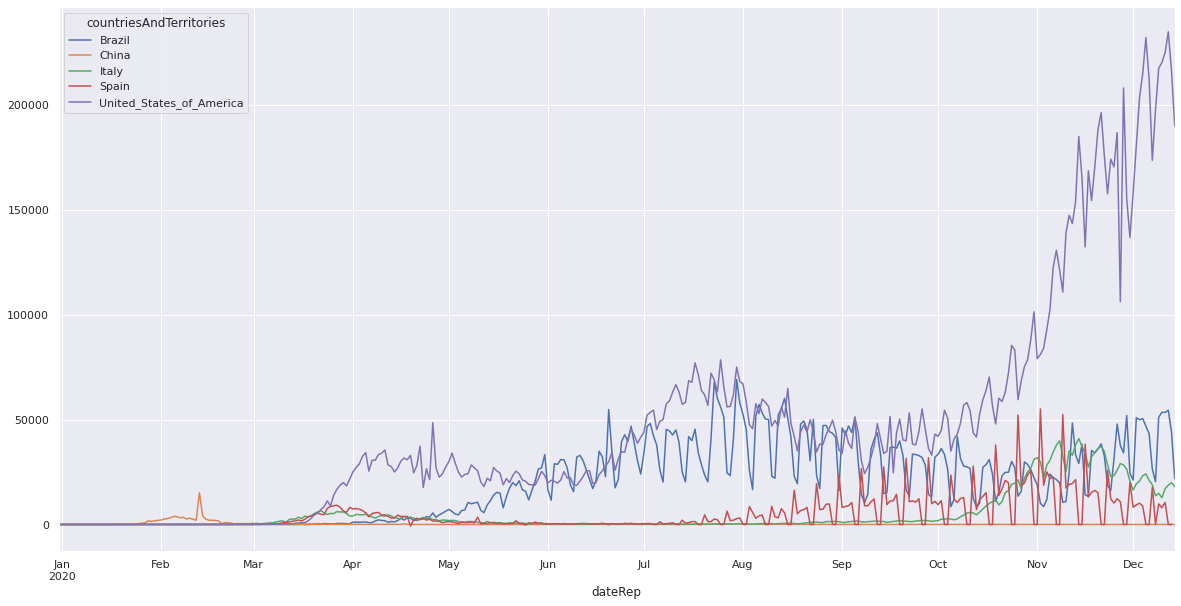

In [ ]:
dados3_1 = dados2.pivot(columns="countriesAndTerritories")
dados3_1['cases'].plot()

In [ ]:
dados2["CUM_CASES_THOUSAND_HABITANTS_OVER_TIME"] = dados2.groupby("countriesAndTerritories")["cases"].cumsum()/1000
dados4_1 = dados2.pivot(columns="countriesAndTerritories")
print(dados4_1.head(5))

                           day                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                31.0  31.0  31.0  31.0                     31.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0   
2020-01-02                 2.0   2.0   2.0   2.0                      2.0   
2020-01-03                 3.0   3.0   3.0   3.0                      3.0   
2020-01-04                 4.0   4.0   4.0   4.0                      4.0   

                         month                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                12.0  12.0  12.0  12.0                     12.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0  

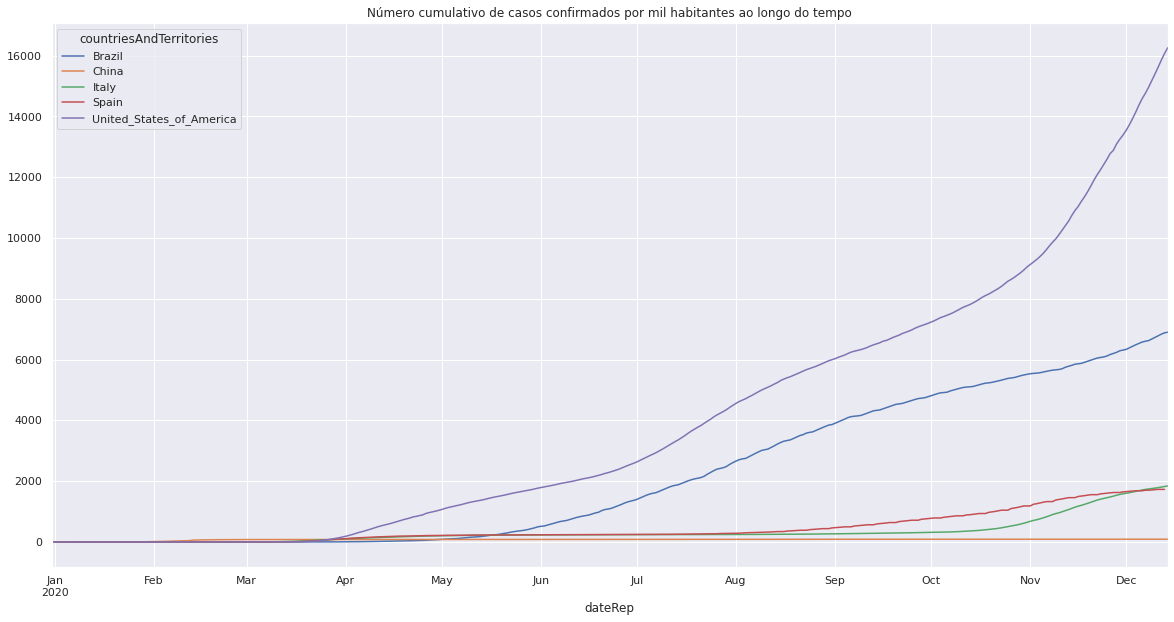

In [ ]:
dados4_1["CUM_CASES_THOUSAND_HABITANTS_OVER_TIME"].plot(title="Número cumulativo de casos confirmados por mil habitantes ao longo do tempo")

# <font color=yellow>Número cumulativo de mortes confirmadas por mil habitantes ao longo do tempo

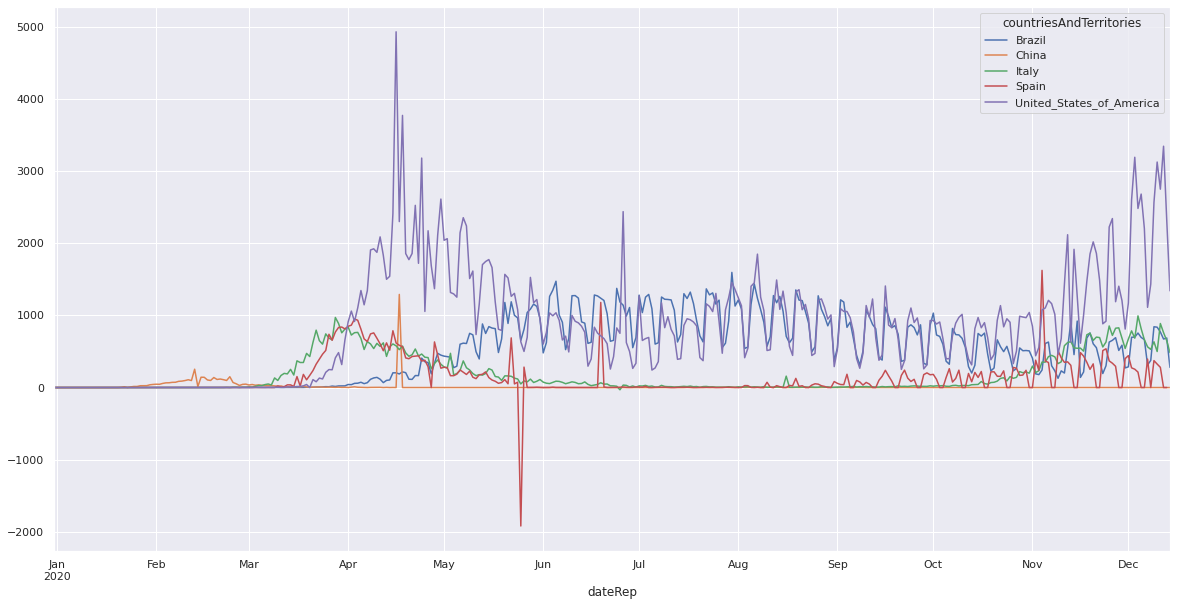

In [ ]:
dados5_1 = dados2.pivot(columns="countriesAndTerritories")
dados5_1['deaths'].plot()

In [ ]:
dados2["CUM_DEATHS_THOUSAND_HABITANTS_OVER_TIME"] = dados2.groupby("countriesAndTerritories")["deaths"].cumsum()/1000
dados5_1 = dados2.pivot(columns="countriesAndTerritories")
print(dados5_1.head(5))

                           day                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                31.0  31.0  31.0  31.0                     31.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0   
2020-01-02                 2.0   2.0   2.0   2.0                      2.0   
2020-01-03                 3.0   3.0   3.0   3.0                      3.0   
2020-01-04                 4.0   4.0   4.0   4.0                      4.0   

                         month                                             \
countriesAndTerritories Brazil China Italy Spain United_States_of_America   
dateRep                                                                     
2019-12-31                12.0  12.0  12.0  12.0                     12.0   
2020-01-01                 1.0   1.0   1.0   1.0                      1.0  

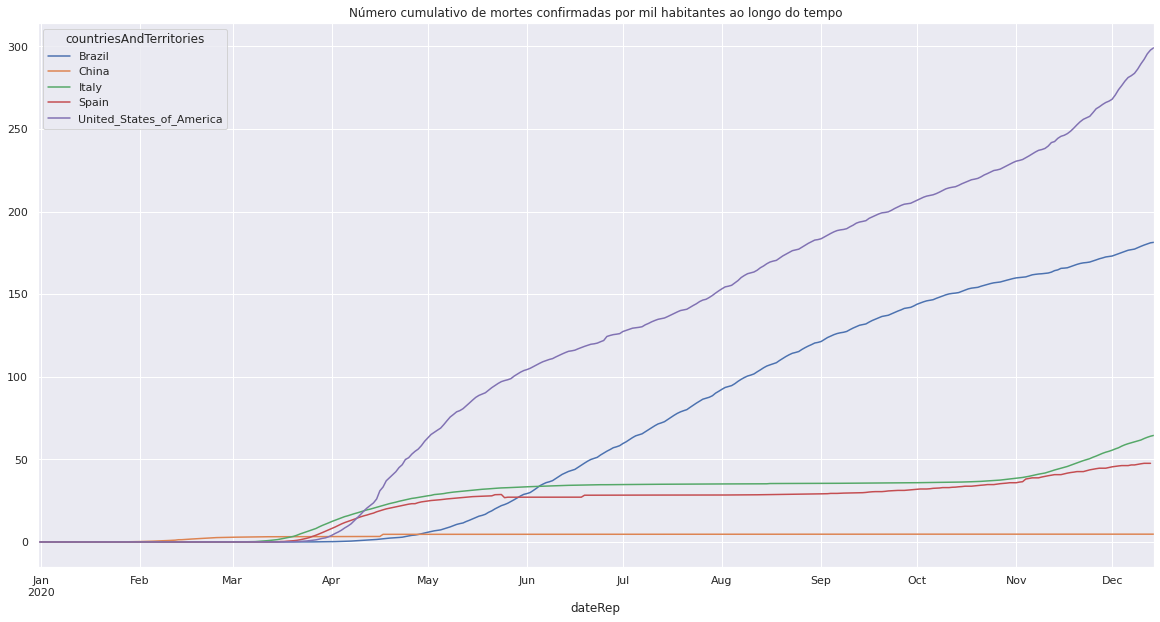

In [ ]:
dados5_1["CUM_DEATHS_THOUSAND_HABITANTS_OVER_TIME"].plot(title="Número cumulativo de mortes confirmadas por mil habitantes ao longo do tempo")